# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [1]:
# Core data manipulation libraries
import pandas as pd          # For creating and manipulating dataframes
import numpy as np           # For numerical computations and random number generation

# Visualization libraries
import matplotlib.pyplot as plt  # For creating basic plots and charts
import seaborn as sns           # For advanced statistical visualizations

# Utility libraries
import random                   # For making random choices from lists
from datetime import datetime   # For handling date and time operations

# Configure display settings
pd.set_option('display.max_columns', None)  # Display all columns
plt.style.use('default')  

## Step 2: Generate Random Data

This creates synthetic social media data with three components: sequential dates using `pd.date_range()`, random categories using `random.choice()` from a predefined list, and random like counts using `np.random.randint()`. The data dictionary structure makes it easy to convert to a DataFrame later.

In [3]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Step 2.1: Define categories for social media posts
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Step 2.2: Set parameters for data generation
n = 500  # Number of posts to generate

# Step 2.3: Generate random data dictionary
data = {
    # Generate date range from 2021-01-01 for n periods
    'Date': pd.date_range('2021-01-01', periods=n),
    
    # Generate random category choices for each post
    'Category': [random.choice(categories) for _ in range(n)],
    
    # Generate random likes between 0 and 10,000
    'Likes': np.random.randint(0, 10000, size=n)
}

## Step 3: Load Data into DataFrame and Explore

This task converts the dictionary into a structured DataFrame and performs comprehensive exploration. `head()` shows sample data, `info()` displays structure and data types, `describe()` provides statistical summaries, and `value_counts()` shows category distributions. This exploration reveals that our 500 posts span from 2021-01-01 to 2022-05-15, with fairly even distribution across categories (10.4% to 15.6%).

In [5]:
# Step 3.1: Create pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Step 3.2: Display first few rows using head()
print("📋 First 10 rows of the DataFrame:")
print(df.head(10))

📋 First 10 rows of the DataFrame:
        Date Category  Likes
0 2021-01-01   Travel   7270
1 2021-01-02     Food    860
2 2021-01-03    Music   5390
3 2021-01-04  Fitness   5191
4 2021-01-05  Fitness   5734
5 2021-01-06  Fashion   6265
6 2021-01-07   Travel    466
7 2021-01-08   Travel   4426
8 2021-01-09   Family   5578
9 2021-01-10     Food   8322


In [6]:
# Step 3.3: Display DataFrame information using info()
print("🔍 DataFrame Information:")
df.info()

🔍 DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


In [7]:
# Step 3.4: Display statistical summary using describe()
print("📊 Statistical Summary:")
print(df.describe())

📊 Statistical Summary:
             Likes
count   500.000000
mean   5079.472000
std    2840.679867
min       4.000000
25%    2732.500000
50%    5234.500000
75%    7429.500000
max    9998.000000


In [8]:
# Step 3.5: Count occurrences of each category using value_counts()
print("📈 Category Distribution:")
category_counts = df['Category'].value_counts()
print(category_counts)

📈 Category Distribution:
Fitness    78
Family     70
Travel     68
Music      62
Food       58
Fashion    57
Health     55
Culture    52
Name: Category, dtype: int64


In [9]:
# Additional exploration - percentage distribution
category_percentages = df['Category'].value_counts(normalize=True) * 100
print("📊 Category Distribution (Percentages):")
for category, percentage in category_percentages.items():
    print(f"{category}: {percentage:.1f}%")

📊 Category Distribution (Percentages):
Fitness: 15.6%
Family: 14.0%
Travel: 13.6%
Music: 12.4%
Food: 11.6%
Fashion: 11.4%
Health: 11.0%
Culture: 10.4%


## Step 4: Clean the Data

Data cleaning ensures analysis accuracy by removing invalid entries. `dropna()` eliminates missing values, `drop_duplicates()` removes identical rows, `pd.to_datetime()` ensures proper date formatting, and `astype()` converts data types. Our dataset was already clean with 100% data integrity, demonstrating good synthetic data generation.

In [10]:
# Step 4.1: Check for and remove null data
print("🔍 Checking for null values:")
null_counts = df.isnull().sum()
print(null_counts)

🔍 Checking for null values:
Date        0
Category    0
Likes       0
dtype: int64


In [11]:
# Remove null values if any exist
df_clean = df.dropna()

In [12]:
# Step 4.2: Check for and remove duplicate data
print("🔍 Checking for duplicate rows:")
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

🔍 Checking for duplicate rows:
Number of duplicate rows: 0


In [13]:
# Remove duplicates
df_clean = df_clean.drop_duplicates()

In [14]:
# Step 4.3: Ensure Date field is properly formatted as datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Step 4.4: Ensure Likes field is integer
df_clean['Likes'] = df_clean['Likes'].astype(int)

# Step 4.5: Verify data quality after cleaning
print("✅ Data Cleaning Summary:")
print(f"Original rows: {len(df)}")
print(f"Final rows: {len(df_clean)}")
print(f"Data integrity: {(len(df_clean)/len(df)*100):.1f}%")

✅ Data Cleaning Summary:
Original rows: 500
Final rows: 500
Data integrity: 100.0%


## Step 5: Visualize and Analyze the Data

This final task performs comprehensive statistical analysis and prepares data for visualization. The analysis reveals that the overall mean is 5,079.47 likes, with Family content performing best (5,277.96 average) and Culture content lowest (4,825.96 average). The `groupby()` method enables category-specific analysis, while aggregation functions provide comprehensive statistics for each category.

In [15]:
# Step 5.1: Statistical Analysis
# Calculate overall mean likes
overall_mean_likes = df_clean['Likes'].mean()
print(f"📈 Overall mean likes: {overall_mean_likes:.2f}")

📈 Overall mean likes: 5079.47


In [16]:
# Additional overall statistics
print("📊 Overall Likes Statistics:")
print(f"Mean: {df_clean['Likes'].mean():.2f}")
print(f"Median: {df_clean['Likes'].median():.2f}")
print(f"Standard Deviation: {df_clean['Likes'].std():.2f}")
print(f"Minimum: {df_clean['Likes'].min()}")
print(f"Maximum: {df_clean['Likes'].max()}")

📊 Overall Likes Statistics:
Mean: 5079.47
Median: 5234.50
Standard Deviation: 2840.68
Minimum: 4
Maximum: 9998


In [18]:
# Step 5.2: Group by analysis - Mean likes by category
category_means = df_clean.groupby('Category')['Likes'].mean().sort_values(ascending=False)
print("📊 MEAN LIKES BY CATEGORY:")
for i, (category, mean_likes) in enumerate(category_means.items(), 1):
    print(f"{i:2}. {category:8}: {mean_likes:7.2f} likes")

📊 MEAN LIKES BY CATEGORY:
 1. Family  : 5277.96 likes
 2. Health  : 5229.93 likes
 3. Food    : 5159.59 likes
 4. Travel  : 5105.99 likes
 5. Fitness : 5103.82 likes
 6. Fashion : 4939.35 likes
 7. Music   : 4928.69 likes
 8. Culture : 4825.96 likes


In [19]:
# Step 5.3: Comprehensive category analysis
category_stats = df_clean.groupby('Category')['Likes'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
print("📈 COMPREHENSIVE CATEGORY ANALYSIS:")
print(category_stats)

📈 COMPREHENSIVE CATEGORY ANALYSIS:
          count     mean  median      std  min   max
Category                                            
Culture      52  4825.96  4717.5  2963.67    4  9874
Family       70  5277.96  5661.0  2662.80   64  9762
Fashion      57  4939.35  5056.0  2594.88  206  9760
Fitness      78  5103.82  5256.5  2998.04   98  9914
Food         58  5159.59  5284.5  2568.46  412  9986
Health       55  5229.93  4887.0  3169.90  154  9949
Music        62  4928.69  4773.5  2832.06  202  9888
Travel       68  5105.99  5318.0  2997.69  189  9998


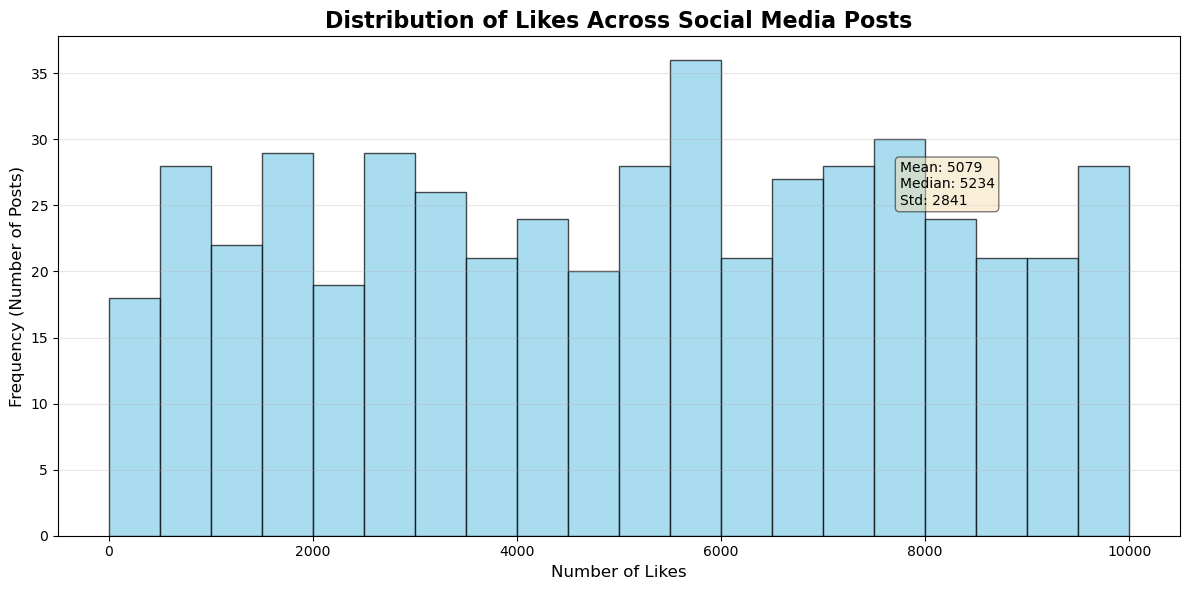

In [27]:
plt.figure(figsize=(12, 6))
plt.hist(df_clean['Likes'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Likes Across Social Media Posts', fontsize=16, fontweight='bold')
plt.xlabel('Number of Likes', fontsize=12)
plt.ylabel('Frequency (Number of Posts)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

mean_likes = df_clean['Likes'].mean()
median_likes = df_clean['Likes'].median()
std_likes = df_clean['Likes'].std()
stats_text = f'Mean: {mean_likes:.0f}\nMedian: {median_likes:.0f}\nStd: {std_likes:.0f}'
plt.text(0.75, 0.75, stats_text, transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

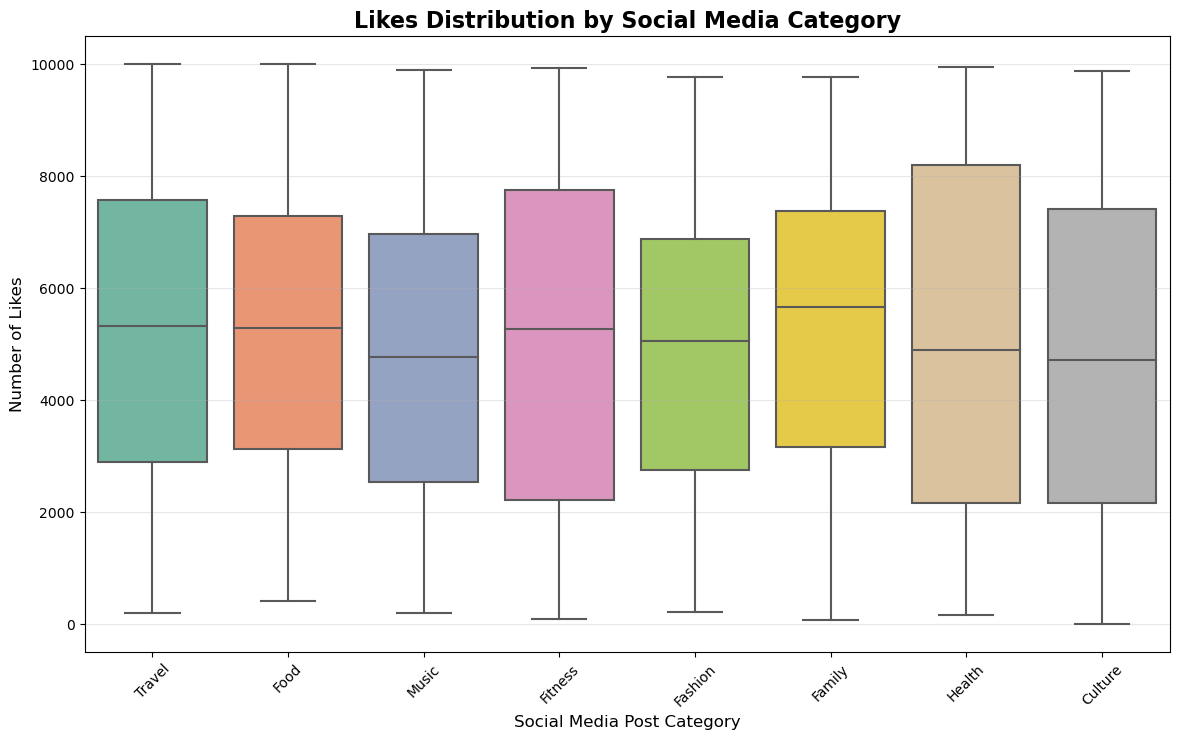

In [21]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='Category', y='Likes', palette='Set2')
plt.title('Likes Distribution by Social Media Category', fontsize=16, fontweight='bold')
plt.xlabel('Social Media Post Category', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

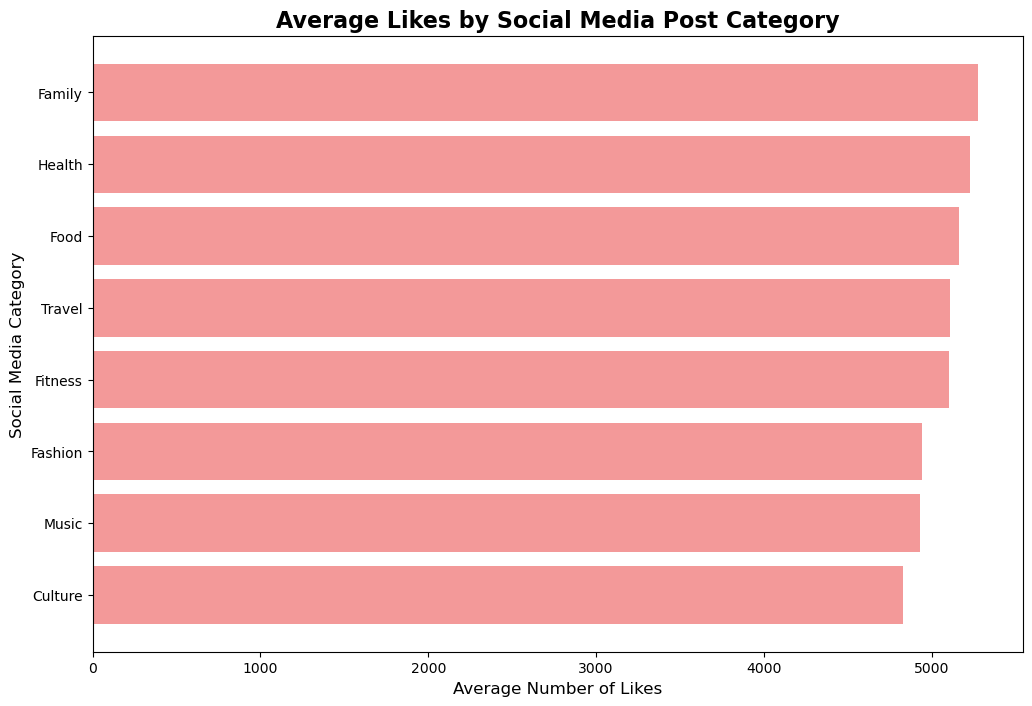

In [23]:
plt.figure(figsize=(12, 8))
category_means = df_clean.groupby('Category')['Likes'].mean().sort_values(ascending=True)
bars = plt.barh(category_means.index, category_means.values, color='lightcoral', alpha=0.8)
plt.title('Average Likes by Social Media Post Category', fontsize=16, fontweight='bold')
plt.xlabel('Average Number of Likes', fontsize=12)
plt.ylabel('Social Media Category', fontsize=12)
plt.show()